The reference equation:

![radial equation of the motion](eq.png)

where:

- $a'=149 598 261$ km

- $n~′ = 0.98560025^{\circ}$

- $a = 384399$ km

- $n = 13.17639646^\circ$ 

- $e ′ = 0.016711$

- $e = 0.05488$

- $ι = 5.161^\circ$

- $m = n ′ /n = 0.07480$

- $T = n t$

- $c \simeq  -3/4 -225/32*m + \mathcal{O}(m^2)$.


In [127]:
import math

#params
n_star = 0.98560025*math.pi/180
a = 384399*1000
alpha_0=0
n = 13.17639646*math.pi/180 #2*pi:360=x*n
e = 0.05488
m = n_star /n 
c=-3/4-224/32*m


In [144]:
from math import cos

#the orbital fucntion
def r_of_t(t, n=n, alpha_0=0, km=False):
    T=n*t
    #T=t
    if km:
        return  (a*(1-e*cos((1+c*m**2)*T- alpha_0)+ 0.5* e**2 -1/6*m**2 -1/2*e**2*cos(2*(1+c*m**2)*T -2*alpha_0) -m**2*cos(2*(1-m)*T)-15/8*m*e*cos((1-2*m-c*m**2)*T+alpha_0)))/1000.
    return  (1-e*cos((1+c*m**2)*T- alpha_0)+ 0.5* e**2 -1/6*m**2 -1/2*e**2*cos(2*(1+c*m**2)*T -2*alpha_0) -m**2*cos(2*(1-m)*T)-15/8*m*e*cos((1-2*m-c*m**2)*T+alpha_0))

In [142]:
np.arange(0, rrange, 10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380,
       390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510,
       520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640,
       650, 660, 670, 680, 690])

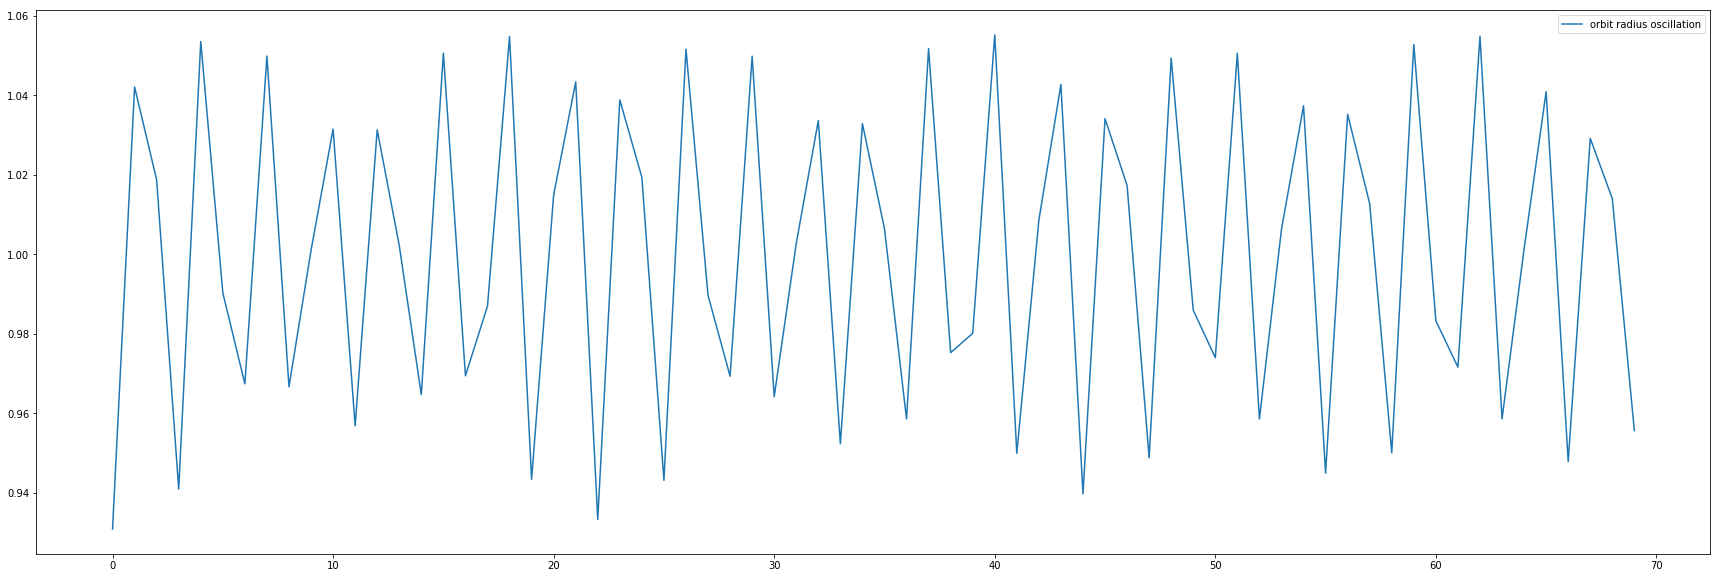

In [146]:

plot_every_min = False
if plot_every_min:
    rrange = 24*60 #every minute for 1 days
    scale_factor = 60
else: #plot_every_hour
    rrange = 700 #every hour for 10 days
    scale_factor = 1#60*60*24

plt.subplots(figsize=(30,10))
pts=[]
times=np.arange(0, rrange, 10)
for t in times:
    pts.append(r_of_t(t*scale_factor, alpha_0=0, km=False))
plt.plot(pts, label= "orbit radius oscillation")
#plt.hlines(a/1000,xmin=0, xmax=24, label="mean distance (~384e3 km)")
#plt.xscale()
#plt.xlim((0,700))
plt.legend()
plt.show()

#pts